In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [3]:
def movavg(inp, bl, ss):
    nbin = int(np.floor((inp.shape[2] - bl) / ss))
    out = np.nan * np.zeros((inp.shape[0], inp.shape[1], nbin))
    for ibin in range(nbin):
        out[:, :, ibin] = np.sum(inp[:, :, int(ibin*ss):int(ibin*ss)+bl], 2) / bl * 1000
    return out

In [ ]:
itc = movavg(np.load('G:\Data\Fast\Both\ITCNoAvg.npy'), 25, 1)
pfc = movavg(np.load('G:\Data\Fast\Both\PFCNoAvg.npy'), 25, 1)

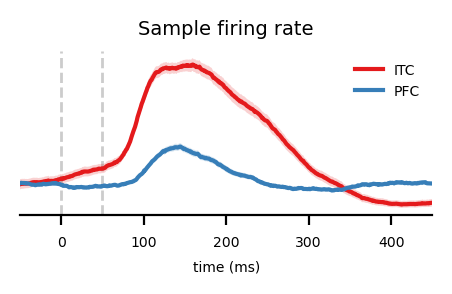

In [10]:
tim = np.arange(-200, 675) + 12.5
sns.set_palette('Set1')

cm = 1 / 2.54
fig, axs = plt.subplots(1, 1, figsize=(6 * cm, 4 * cm), dpi=200)

df = {'tim': np.tile(tim, (165, 1)).flatten(), 'itc': itc[:, 9, :].flatten(),'pfc': pfc[:, 245, :].flatten()}
axs.axvline(0, color='k', ls='dashed', lw=1, alpha=.2)
axs.axvline(50, color='k', ls='dashed', lw=1, alpha=.2)
X = itc[:, 9, :]
axs.plot(tim, X.mean(0), label='ITC')
axs.fill_between(tim, \
    X.mean(0) + 1.96 / np.sqrt(X.shape[0]) * X.std(0), 
    X.mean(0) - 1.96 / np.sqrt(X.shape[0]) * X.std(0), 
    alpha=.2, label='_nolegend_')

X = pfc[:, 245, :]
axs.plot(tim, X.mean(0), label='PFC')
axs.fill_between(tim, \
    X.mean(0) + 1.96 / np.sqrt(X.shape[0]) * X.std(0), 
    X.mean(0) - 1.96 / np.sqrt(X.shape[0]) * X.std(0), 
    alpha=.2, label='_nolegend_')

axs.set_xlim(-50, 450)
axs.set_title('Sample firing rate', fontsize=7)
axs.legend(frameon=False, fontsize=5)
axs.set_xlabel('time (ms)', fontsize=5)
axs.set_ylabel('')
axs.set_yticks([])
axs.tick_params(axis='both', which='major', labelsize=5)

sns.despine(left=True)
fig.tight_layout()

plt.savefig('sample-psth.pdf')

In [4]:
itc = movavg(np.load('G:\Data\Fast\Both\ITCNoAvg.npy'), 50, 1)
pfc = movavg(np.load('G:\Data\Fast\Both\PFCNoAvg.npy'), 50, 1)
tim = np.arange(-200, 650) + 25

In [27]:
def fonsets(tim, m, nsw: int=5):
    onsets = []
    
    bl = (tim < 0) & (tim >= -20)

    for rep in range(m.shape[0]):
        rm = m[rep, :]
        rm -= rm[bl].mean()

        maxv = rm[(tim > 50) & (tim < 250)].max()
        if maxv < 5:
            continue

        thresh = 0.15 * (maxv)
        ht = rm > thresh
        cht = np.convolve(ht, np.ones(nsw), 'same') == nsw

        cht[tim<50] = 0
        cht[tim>250] = 0

        try:
            onsets.append(tim[np.argwhere(cht)[0] - nsw][0])
            if onsets[-1] < 50:
                plt.plot(tim, rm)
                plt.title(rep)
                break

        except:
            continue
    return np.array(onsets)

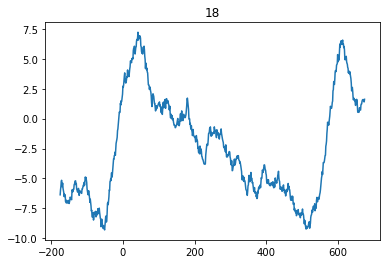

In [28]:
# itc_onsets = fonsets(tim, itc.mean(0))
pfc_onsets = fonsets(tim, pfc.mean(0), nsw=10)

# plt.hist(itc_onsets)
# plt.hist(pfc_onsets)

# print(itc_onsets.shape)


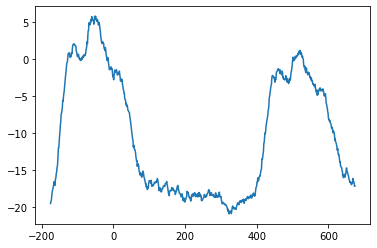

In [117]:
ineuron = 43
plt.plot(tim, pfc[:, ineuron, :].mean(0) - pfc[:, ineuron, (tim >= -30) & (tim < 0)].mean())

In [26]:
pfc_onsets

array([40])

In [32]:
for ineuron in range(itc.shape[1]):
    neuron = itc[:, ineuron+1, :].mean(0)

    maxv = np.max(neuron[(tim > 70) & (tim < 200)])
    amax = np.argwhere(neuron == maxv).flatten()[0]

    basv = neuron[(tim > -30) & (tim < 20)].mean(0)
    
    thrs = 0.15 * (maxv - basv) + basv

    plt.plot(np.convolve((neuron > thrs), np.ones((1, 5))))
    break

ValueError: object too deep for desired array

In [31]:
tim[amaxv]

151